In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from google.colab import files
import io

warnings.filterwarnings('ignore')

uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('Datathon #2 Heart Failure Mortality.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

df.shape


Saving Datathon #2 Heart Failure Mortality.csv to Datathon #2 Heart Failure Mortality (1).csv


(299, 13)

In [ ]:
# Getting a brief understanding of the data, seeing if there are any implausible values and outliers
print(df.describe())
print(df.shape)
# Doesn't seem to be any outliers

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  hypertension      platelets  serum_creatinine  \
count         299.000000    299.000000     299.000000         299.00000   
mean           38.083612      0.351171  263358.029264           1.39388   
std            11.834841      0.478136   97804.236869           1.03451   
min            14.000000      0.000000   25100.000000       

In [ ]:
#Convert platelet to kiloplatet/mL

df['platelets'] = df['platelets'] / 1000

print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  hypertension   platelets  serum_creatinine  \
count         299.000000    299.000000  299.000000         299.00000   
mean           38.083612      0.351171  263.358029           1.39388   
std            11.834841      0.478136   97.804237           1.03451   
min            14.000000      0.000000   25.100000           0.50000   


In [ ]:
# Check for missing values in each column
print(df.isna().sum())
# No missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
hypertension                0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
hf_mortality                0
dtype: int64


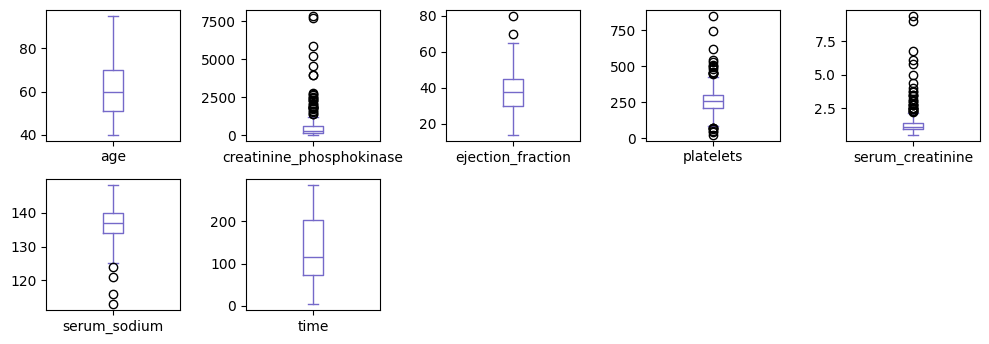

In [ ]:
description = df.drop(['anaemia', 'diabetes', 'hypertension', 'hf_mortality', 'sex', 'smoking'], axis=1)
# Visual representation of df.describe()
description.plot(kind='box', subplots=True, layout=(3, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

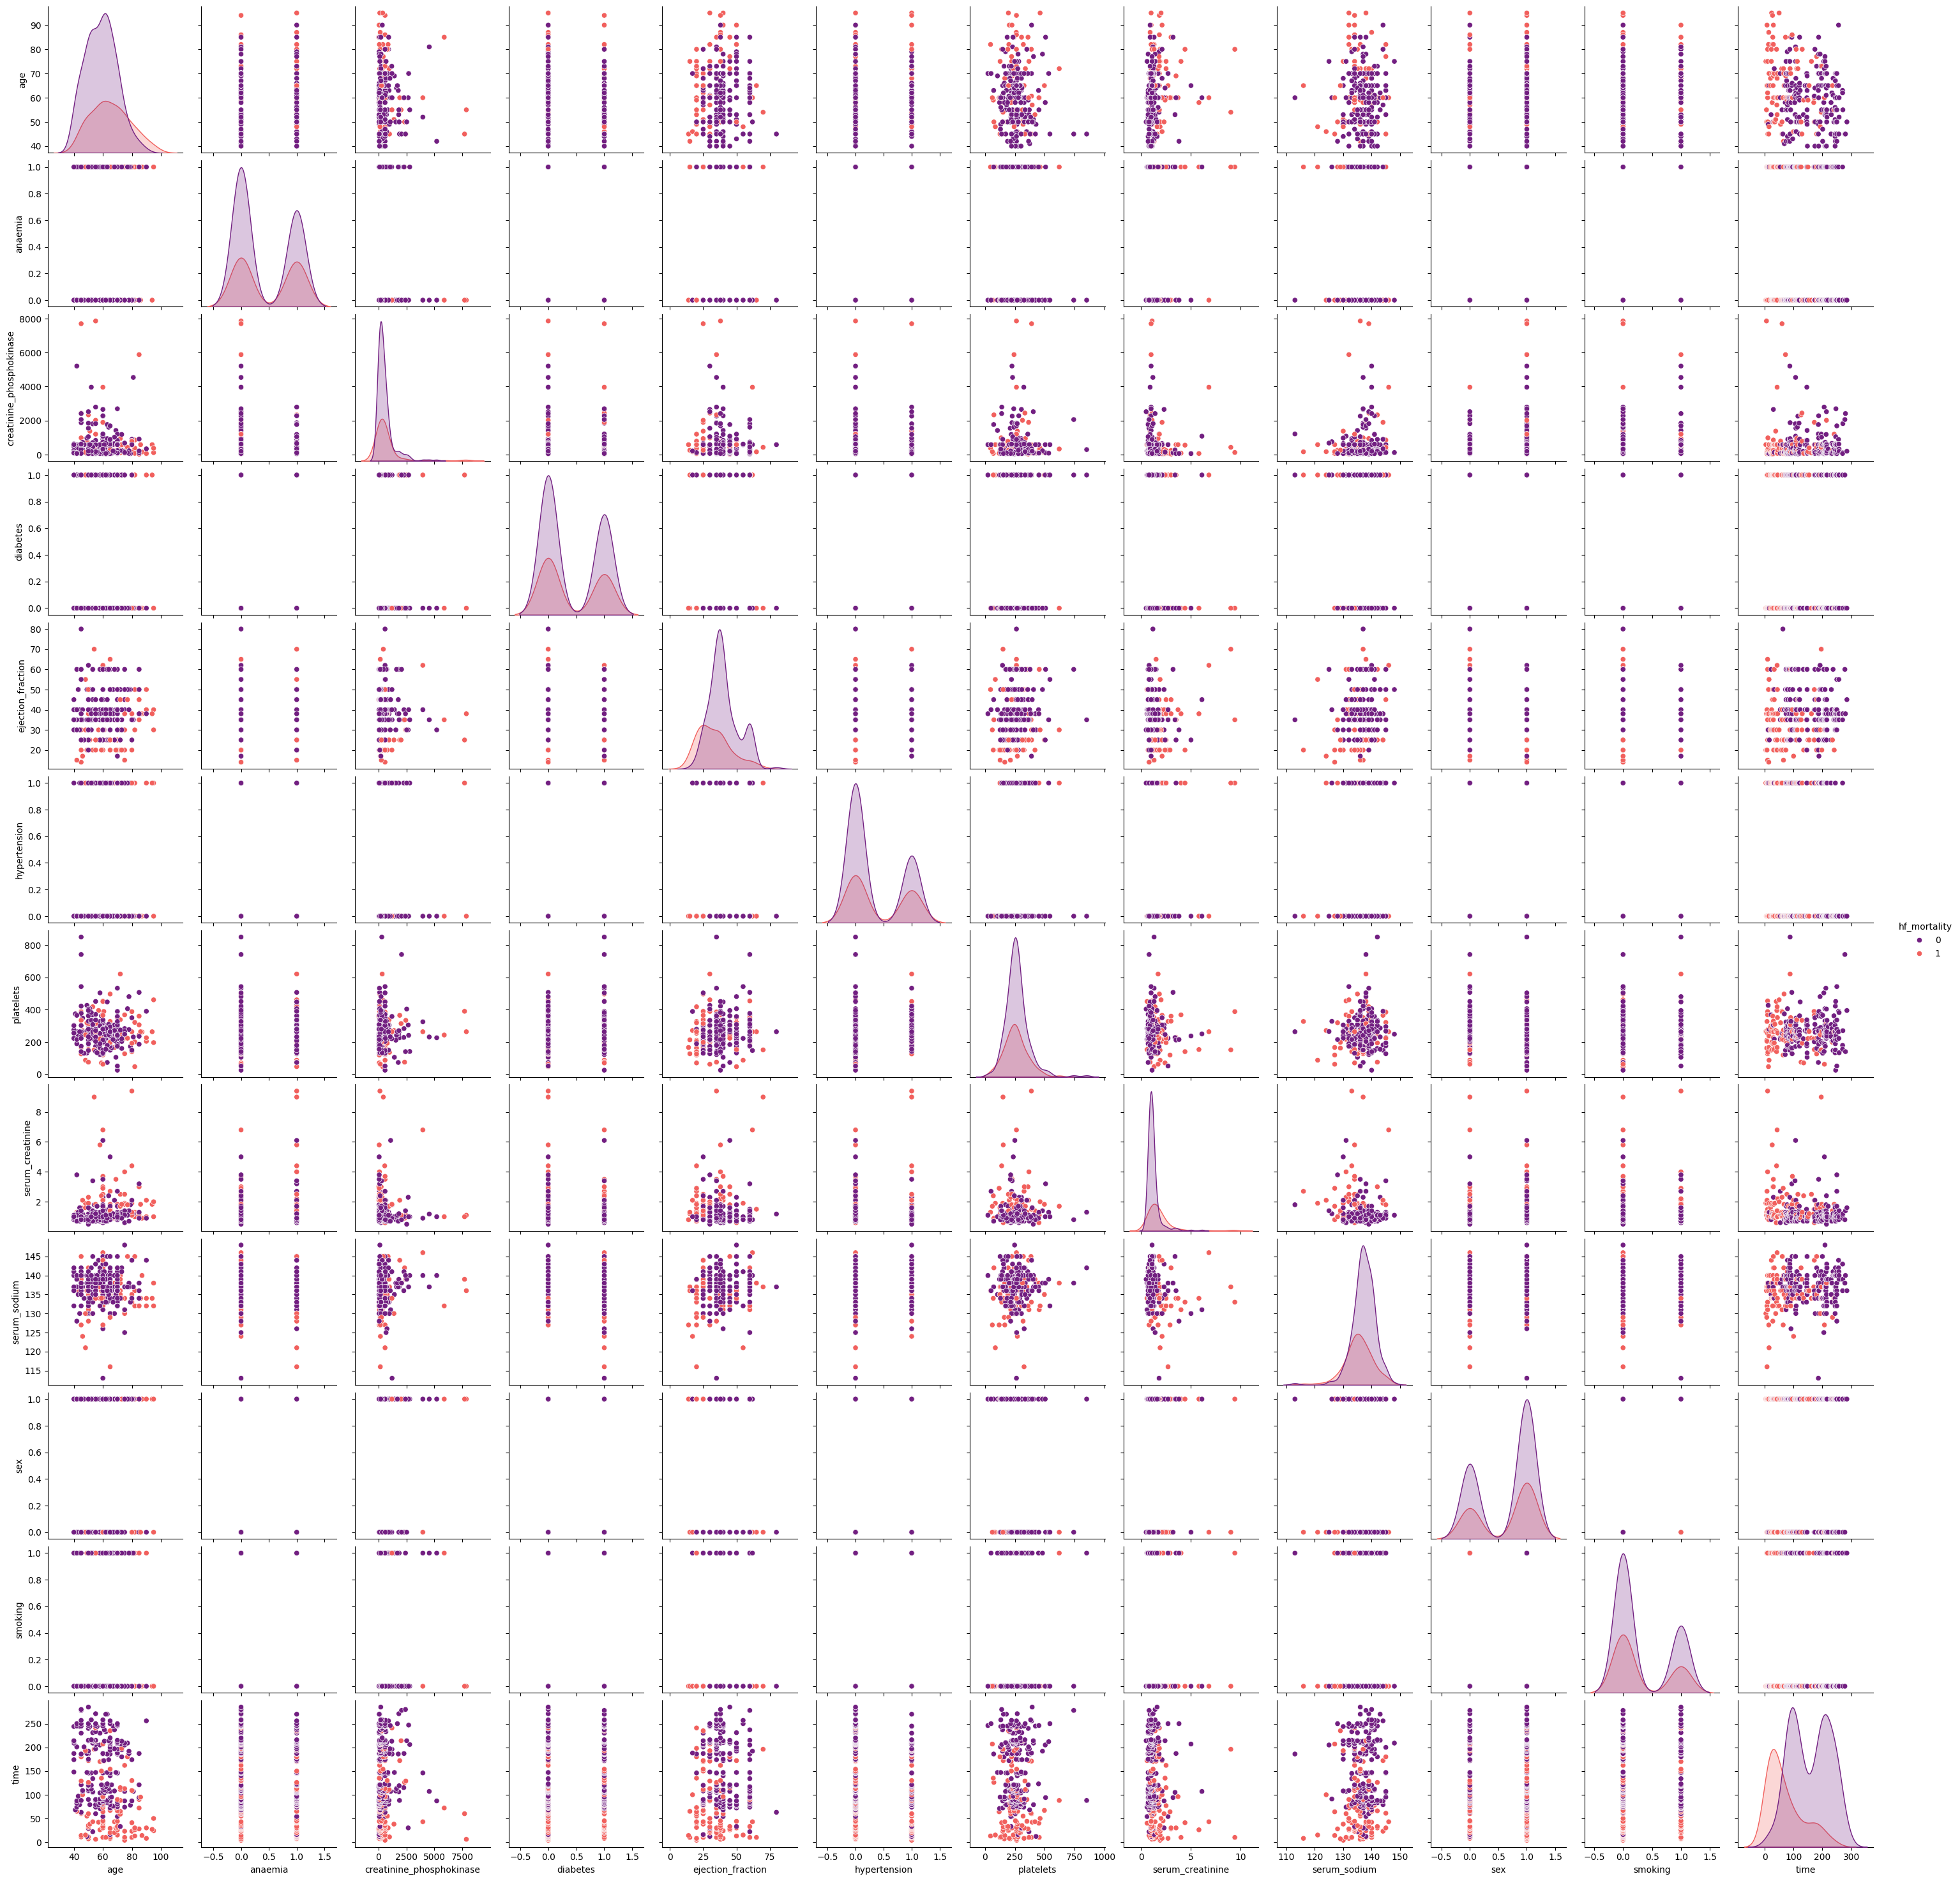

In [ ]:
# Display pair plot for data visualization
# Understanding the relationships and patterns between different variables
sns.pairplot(df, hue='hf_mortality', palette="magma")
plt.show()

In [ ]:
# Split the data into features and target variable
X = df.drop('hf_mortality', axis=1)
y = df['hf_mortality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# The penalty parameter is used to specify the norm used in the penalization: l1 or l2 regularization.
# The C parameter represents inverse of regularization strength, smaller values specify stronger regularization.
# The solver parameter specifies the algorithm to use in the optimization problem.

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[50  3]
 [15 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        53
           1       0.88      0.59      0.71        37

    accuracy                           0.80        90
   macro avg       0.82      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90



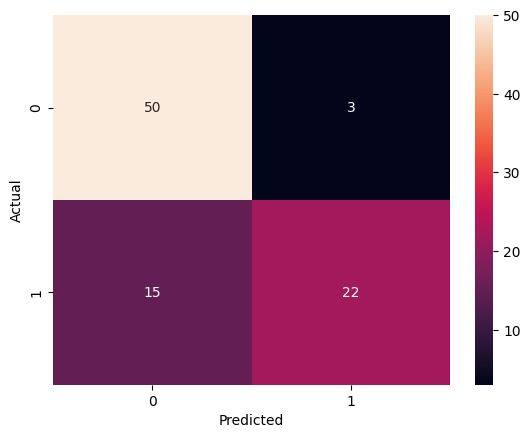

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import statsmodels.api as sm

# Separate features and target variable
X = df.drop('hf_mortality', axis=1)
y = df['hf_mortality']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg1 = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg1.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           hf_mortality   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.4151
Time:                        15:02:14   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.1849      5.657      1.801      0.072      -0.902

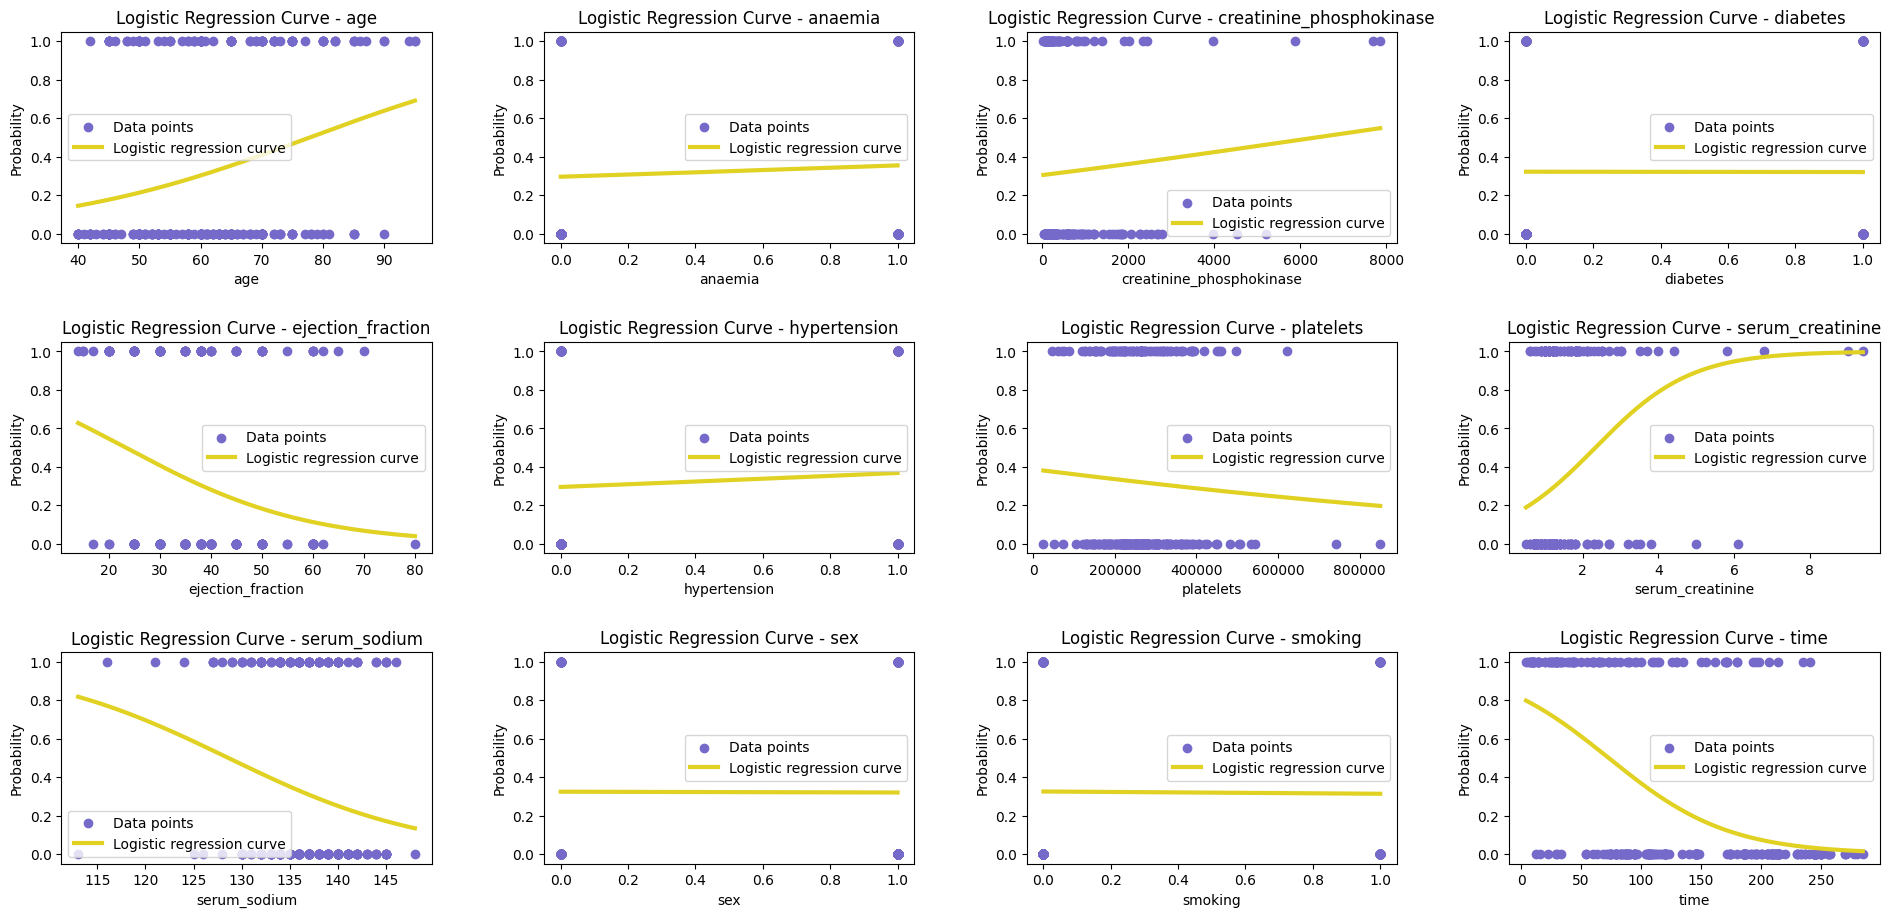

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'hf_mortality' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df[[feature]]
    y = df['hf_mortality']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

Evaluating different methods for model regularization and hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models with different regularization and hyperparameters
models = {
    'Baseline': LogisticRegression(),
    'L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    'Tuned': GridSearchCV(
        LogisticRegression(),
        param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
        cv=5,
        scoring='accuracy'  # Choose an appropriate scoring metric
    )
}

# Evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results
print(results_df)

        Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Baseline  0.788889   0.875000  0.567568  0.688525  0.755482
1          L1  0.800000   0.880000  0.594595  0.709677  0.768995
2          L2  0.800000   0.880000  0.594595  0.709677  0.768995
3  ElasticNet  0.788889   0.875000  0.567568  0.688525  0.755482
4       Tuned  0.788889   0.846154  0.594595  0.698413  0.759561


Evaluating L2 regluarization with different values for C

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Assuming you have X_train, X_test, y_train, y_test

# Define the range of C values to evaluate
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Store results
results = []

# Iterate through C values
for C in C_values:
    # Create and train the model
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results.append([C, f1])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['C', 'f1'])

# Print the results
print(results_df)

         C        f1
0    0.001  0.707692
1    0.010  0.718750
2    0.100  0.688525
3    1.000  0.709677
4   10.000  0.709677
5  100.000  0.709677
